In [1]:
import os
if(os.path.exists("./dqn_example.py")):
    os.chdir("..")
    
import matplotlib.pyplot as plt
import pandas as pd
from absl import flags, app

from run import eval

C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or qu

cuda


In [3]:
root = './runs/'

def get_labels(folder, key):
    labels = dict()
    # extract learning_rates from flags.txt
    date_dirs = os.listdir(os.path.join(root, folder))
    for date_dir in date_dirs:
        flags_dir = os.path.join(root, folder, date_dir, 'flags.txt')
        if(os.path.exists(flags_dir)):
            with open(flags_dir, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if(line.startswith(f'--{key}')):
                        labels[date_dir] = line.split('=')[1].strip()
    try:
        # convert values to float if possible
        labels = {k: float(v) for k, v in labels.items()}
    except:
        pass
    return labels

def prep_labels(labels, df):
    if(labels == None):
        labels = df.columns
    elif(isinstance(labels, dict)):
        labels = list(labels.values())
    if(isinstance(labels[0], float)):
        df.columns = labels
        df = df.sort_index(axis=1)
        labels = df.columns
    return labels


def show_boxplot(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(figsize=(22, 5))
    axs.set_title(title)
    labels = prep_labels(labels, df)

    axs.boxplot(df, labels=labels, vert=False)
    axs.set_xlabel("reward")
    axs.set_ylabel(ylabel)
    plt.show()

def show_hists(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(df.shape[1], 1, sharex=True, sharey=True, figsize=(22, 5))
    axs = axs.flatten()
    axs[0].set_title(title)
    labels = prep_labels(labels, df)

    for i in range(0, df.shape[1], 1):
        i_data = df.shape[1]-1 - i
        axs[i].hist(df.iloc[:, i_data], bins=30)
        # axs[i].set_xlabel("reward")
        axs[i].set_ylabel(labels[i_data])

    fig.text(0.5, -0.01, 'reward', ha='center')
    fig.text(0.0, 0.5, ylabel, va='center', rotation='vertical')
    plt.tight_layout()
    plt.show()

In [8]:
n_evals = 100
folders = ['learning_rate/', 'warmup/', 'exp_final/', 'envs_1M', 'envs_100k', 'network/', 'Baseline+Best/'] # folders to re-evaluate

# if a folder should be re-evaluated, remove eval.csv from it
def main(argv):
    for folder in folders:
        eval_results = dict()
        print(f'<{folder}>:')
        if(not os.path.exists(os.path.join(root, folder, 'eval.csv'))):
            eval_dirs = os.listdir(f'{root}{folder}')
            for eval_dir in eval_dirs:
                label_dict = get_labels(folder, 'network')
                network = 'DQN'
                if eval_dir in label_dict:
                    network = label_dict[eval_dir]

                eval_dir = os.path.join(folder, eval_dir, 'checkpoint-last.pt')

                eval_results[eval_dir] = eval(eval_dir, n_evals, network)
                df = pd.DataFrame.from_dict(eval_results)
                df.to_csv(os.path.join(root, folder, 'eval.csv'))
            else:
                pass

app.run(main, argv = None)

<learning_rate/>:
<warmup/>:
<exp_final/>:
<envs_1M>:
<envs_100k>:
<network/>:
<Baseline+Best/>:
Episode 0: reward=205.0, steps=921, frames=2759
Episode 1: reward=215.0, steps=668, frames=1999
Episode 2: reward=380.0, steps=954, frames=2859
Episode 3: reward=245.0, steps=932, frames=2791
Episode 4: reward=325.0, steps=916, frames=2743
Episode 5: reward=160.0, steps=546, frames=1635
Episode 6: reward=525.0, steps=1048, frames=3139
Episode 7: reward=155.0, steps=664, frames=1989
Episode 8: reward=40.0, steps=425, frames=1271
Episode 9: reward=375.0, steps=1050, frames=3147
Episode 10: reward=60.0, steps=556, frames=1663
Episode 11: reward=215.0, steps=665, frames=1991
Episode 12: reward=115.0, steps=636, frames=1903
Episode 13: reward=305.0, steps=883, frames=2645
Episode 14: reward=105.0, steps=542, frames=1621
Episode 15: reward=560.0, steps=1141, frames=3419
Episode 16: reward=260.0, steps=1016, frames=3045
Episode 17: reward=90.0, steps=615, frames=1841
Episode 18: reward=450.0, step

SystemExit: 

c:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


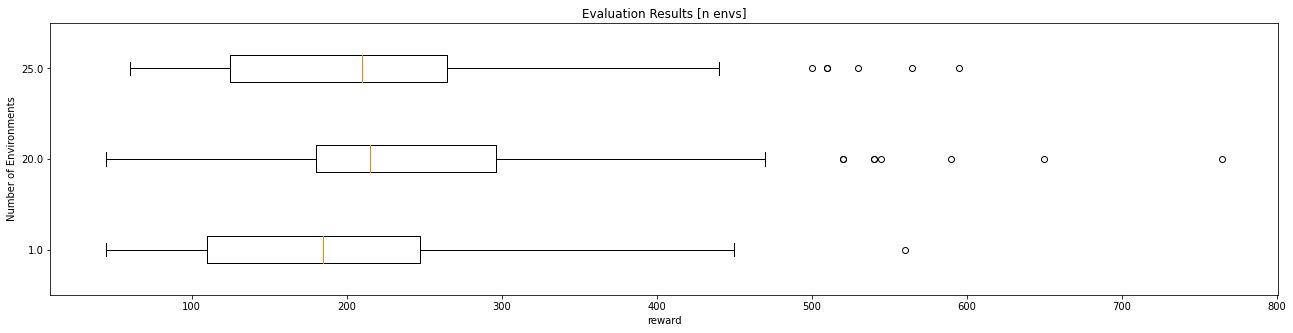

In [35]:
show_boxplot('envs_1M', 'Evaluation Results [n envs]', "Number of Environments", get_labels('envs_1M', 'num_envs'))

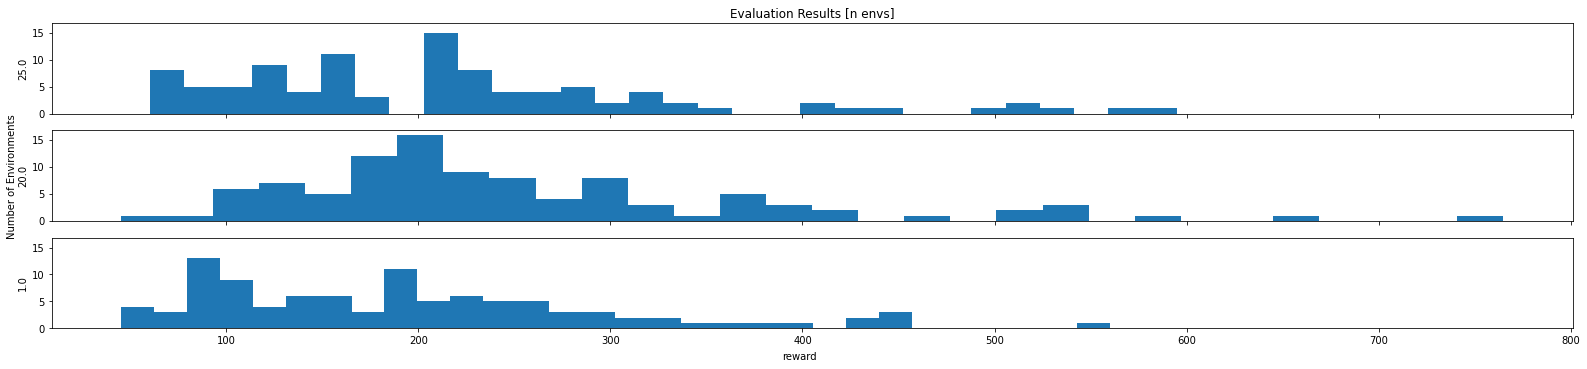

In [57]:
show_hists('envs_1M', 'Evaluation Results [n envs]', "Number of Environments", get_labels('envs_1M', 'num_envs'))

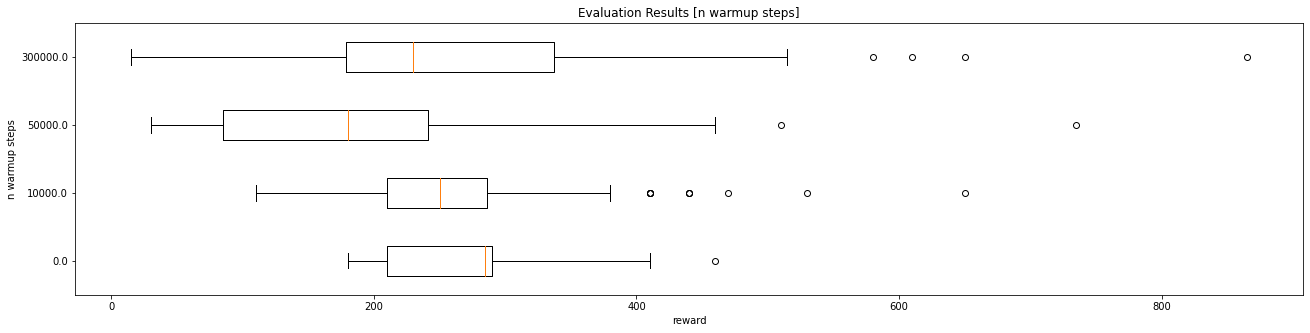

In [58]:
show_boxplot('warmup', 'Evaluation Results [n warmup steps]', "n warmup steps", get_labels('warmup', 'warmup_steps')) # ['0', '10k', '50k', '300k']

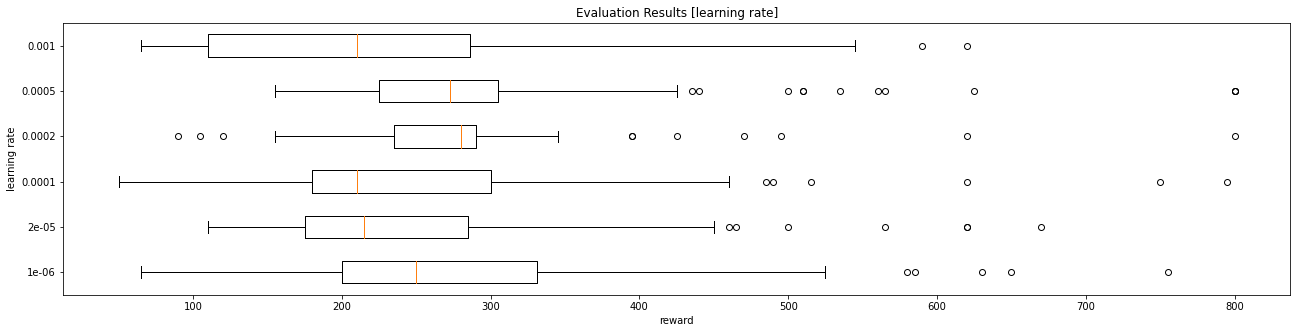

In [60]:
show_boxplot('learning_rate', 'Evaluation Results [learning rate]', "learning rate", get_labels('learning_rate', 'learning_rate'))

In [7]:
get_labels('network', 'network')

{'2022-06-07_11-52-19': 'DQN',
 '2022-06-08_22-19-15': 'DDQN',
 '2022-06-08_23-52-19': 'DUELING_DDQN',
 '2022-06-09_01-31-34': 'DUELING_DQN'}

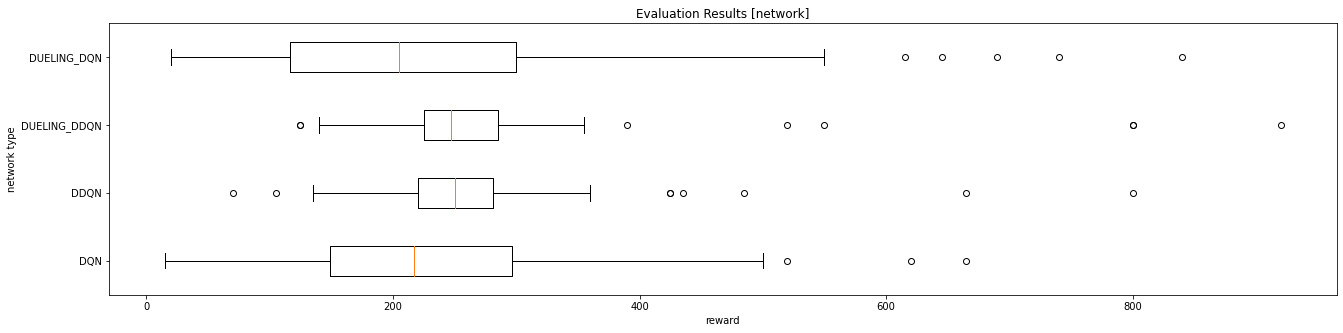

In [61]:
show_boxplot('network', 'Evaluation Results [network]', "network type", get_labels('network', 'network'))

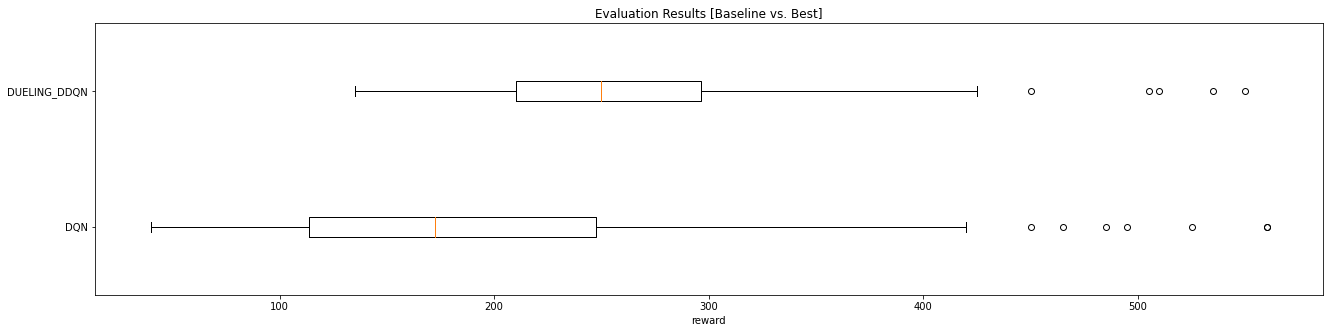

In [12]:
show_boxplot('Baseline+Best', 'Evaluation Results [Baseline vs. Best]', "", get_labels('Baseline+Best', 'network'))